## Problem Statement:  K-Nearest Neighbors (KNN) Algorithm
### Objective: In this tutorial, I implemented and use the K-Nearest Neighbors algorithm for classification tasks using Python. You will practice data preprocessing, model training, and evaluation using the Wine datase

### Tasks:

#### 1. Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, and scikit-learn.

In [1]:
pip install prettytable # library used to print values in table format..

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### 2. Load the dataset: Load the Wine dataset into a pandas DataFrame using the load_wine() function from scikit-learn.

In [4]:
wine_Dataset = datasets.load_wine() # fetch inbuilt dataFrame from scikit-learn.

In [5]:
wine_Dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [6]:
# create DataFrame which Contains data according to feature name column
dataFrameWine = pd.DataFrame(wine_Dataset['data'], columns = wine_Dataset['feature_names'])

In [7]:
dataFrameWine['target'] = wine_Dataset['target']

In [8]:
dataFrameWine.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0


#### 3. Preprocess the data: Split the data into features and target variables. Scale the features using the StandardScaler() function from scikit-learn.

In [ ]:
# create StandardScaler object, 
# then fit and transform Scaled data in Dataframe, which i will later use for training ML Algorithm

In [9]:
scalerObject = StandardScaler()

In [10]:
X_scaler = dataFrameWine.drop('target',axis=1)

In [11]:
scalerObject.fit(X_scaler)

StandardScaler()

In [12]:
scaledWinefeatures = scalerObject.transform(X_scaler)

In [13]:
scaledWinedataFrame= pd.DataFrame(scaledWinefeatures,columns=dataFrameWine.columns[:-1])
scaledWinedataFrame.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### 4. Split the data: Split the data into training and testing sets using the train_test_split() function from scikit-learn. Set the test_size parameter to 0.3 and the random_state parameter to 42.

In [14]:
# split dataframe into training and testing sets
X = scaledWinedataFrame

In [15]:
Y = dataFrameWine['target']

In [16]:
X_train_model,X_test_model,y_train_model,y_test_model = train_test_split(X,Y,test_size=0.3, random_state= 42)

#### 5. Train the model: Create an instance of the KNeighborsClassifier() class from scikit-learn. Set the n_neighbors parameter to 5 and fit the model on the training data.

In [17]:
# create KNN object
KNCObject = KNeighborsClassifier(n_neighbors=5)

In [18]:
KNCObject.fit(X_train_model,y_train_model)

KNeighborsClassifier()

#### 6. Evaluate the model: Predict the target variable for the testing set using the predict() function from scikit-learn. Calculate the accuracy score using the accuracy_score() function from scikit-learn.

In [19]:
# Predict Y values based upon X test dataframe 
y_Pred = KNCObject.predict(X_test_model)

In [20]:
accuracy_score(y_Pred,y_test_model)  # find accuracy of Model

0.9629629629629629

#### 7. Important point : Tune the hyperparameters: Test different values for the n_neighbors parameter to see how it affects the accuracy score. Plot a graph to visualize the relationship between n_neighbors and the accuracy score.

In [21]:
# train the KNN Classifier with hyperparameter of K value ranges from 1 to 20
# then store error mean and accuracy score of model inside List to use them further.... 
avgErrorList = []
accuracyScoreList = []
for i in range(1,21):
    KNCObject = KNeighborsClassifier(n_neighbors=i)
    KNCObject.fit(X_train_model,y_train_model)
    y_pred_i = KNCObject.predict(X_test_model)
    avgErrorList.append(np.mean(y_pred_i != y_test_model))
    accuracyScoreList.append(accuracy_score(y_pred_i,y_test_model))

In [22]:
# Display the values of error mean and accuracy score according to neighbors in the table format for readability...
KNCPerformanceTable = PrettyTable(["n_neighbors", "Mean Error", "Accuracy Score"])
for i in range(1,21):
    KNCPerformanceTable.add_row([i, avgErrorList[i-1], accuracyScoreList[i-1]])
    
# Printing the tabulated list
print(KNCPerformanceTable)

+-------------+----------------------+--------------------+
| n_neighbors |      Mean Error      |   Accuracy Score   |
+-------------+----------------------+--------------------+
|      1      | 0.037037037037037035 | 0.9629629629629629 |
|      2      | 0.05555555555555555  | 0.9444444444444444 |
|      3      | 0.037037037037037035 | 0.9629629629629629 |
|      4      | 0.037037037037037035 | 0.9629629629629629 |
|      5      | 0.037037037037037035 | 0.9629629629629629 |
|      6      | 0.037037037037037035 | 0.9629629629629629 |
|      7      | 0.037037037037037035 | 0.9629629629629629 |
|      8      | 0.018518518518518517 | 0.9814814814814815 |
|      9      | 0.037037037037037035 | 0.9629629629629629 |
|      10     | 0.037037037037037035 | 0.9629629629629629 |
|      11     | 0.037037037037037035 | 0.9629629629629629 |
|      12     | 0.037037037037037035 | 0.9629629629629629 |
|      13     | 0.037037037037037035 | 0.9629629629629629 |
|      14     | 0.037037037037037035 | 0

Text(0, 0.5, 'Mean Error Rate')

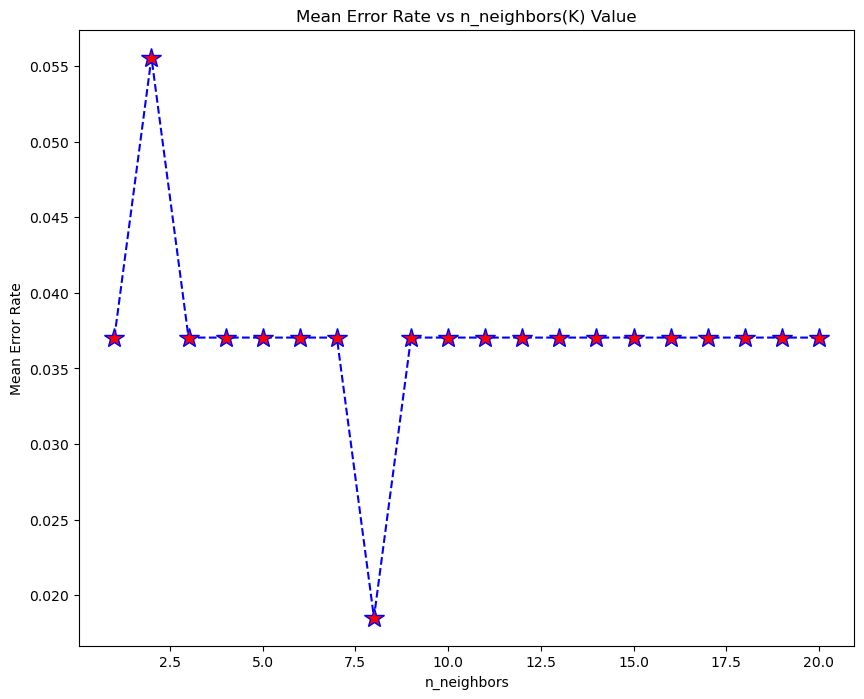

In [48]:
# plot a graph which depect the value of average errors which are generated by specific K value
plt.figure(figsize=(10,8))
plt.plot(range(1,21),avgErrorList,color='blue', linestyle='--', marker="*", markersize=15, markerfacecolor='red')
plt.title('Mean Error Rate vs n_neighbors(K) Value')
plt.xlabel('n_neighbors(K)')
plt.ylabel('Mean Error Rate')

#### 8. Conclusion: Write a conclusion on the performance of the KNN algorithm on the Wine dataset and the optimal value for the n_neighbors parameter.

### I have implemented KNeighborsClassifier with different range of K values (1 to 20). However model with K = 8  value is highly accurate as compared to another K values... 

In [ ]:
# implementation of model with K = 8 to get high accuracy... 

In [24]:
KNCObject = KNeighborsClassifier(n_neighbors=8)

In [25]:
KNCObject.fit(X_train_model,y_train_model)
pred_i = KNCObject.predict(X_test_model)
print(np.mean(pred_i != y_test_model))
print(accuracy_score(pred_i,y_test_model))

0.018518518518518517
0.9814814814814815
